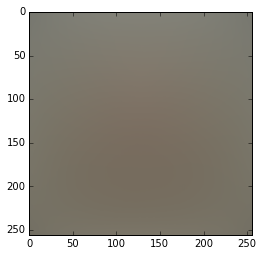

In [6]:
import numpy as np
import scipy.misc

caffe_root='/scr/r6/tgebru/timnit_caffe/'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe


mean_file='/scr/r6/tgebru/timnit_caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy'
mean=np.load(mean_file).copy().squeeze()
channel_swap=(2,1,0) 
transpose=(2,0,1)
mean_scale=mean /255.0
mean_swp=mean_scale[channel_swap,:,:]
mean_transpose=mean_swp.transpose([transpose[t] for t in transpose])

plt.imshow(mean_transpose)


In [7]:
from skimage import data
from skimage.transform import resize

#mean227=scipy.misc.imresize(mean_transpose,(227,227),'bilinear')
#mean216=scipy.misc.imresize(mean_transpose,(216,216),'bilinear')

mean227=resize(mean_transpose,(227,227))
mean216=resize(mean_transpose,(216,216))
print mean_transpose.shape
print mean227.shape
print mean216.shape

print mean_transpose.min(),mean_transpose.max()
print mean227.min(), mean216.max()
print mean216.min(), mean216.max()

(256, 256, 3)
(227, 227, 3)
(216, 216, 3)
0.369185025084 0.512981938381
0.369209682712 0.512902065583
0.36929873568 0.512902065583


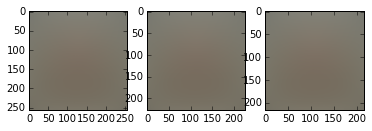

In [10]:
plt.subplot(1,3,1)
plt.imshow(mean_transpose)
plt.subplot(1,3,2)
plt.imshow(mean227)
plt.subplot(1,3,3)
plt.imshow(mean216)

In [12]:
#Reverse transformation
mean227=mean227.copy().squeeze()
mean216=mean216.copy().squeeze()

mean227_scale= mean227*255;
mean216_scale= mean216*255;

mean227_transpose=mean227_scale.transpose(transpose)
mean216_transpose=mean216_scale.transpose(transpose)

mean227_swp=mean227_transpose[channel_swap,:,:]
mean216_swp=mean216_transpose[channel_swap,:,:]

mean227_final=mean227_swp 
mean216_final=mean216_swp 


In [13]:
print mean227_final.shape
print mean216_final.shape
print mean.shape
print mean227_final.min(),mean227_final.max()
print mean216_final.min(),mean216_final.max()
print mean.min(),mean.max()

(3, 227, 227)
(3, 216, 216)
(3, 256, 256)
94.1484690915 130.77006119
94.1711775985 130.790026724
94.1421813965 130.810394287


In [14]:
#save as .npy file
np.save('mean227',mean227_final);
np.save('mean216',mean216_final);

In [213]:
#Save in binaryproto format
mean227_blobproto=caffe.io.array_to_blobproto(mean227_final.reshape((1,3,227,227)))
mean216_blobproto=caffe.io.array_to_blobproto(mean216_final.reshape((1,3,216,216)))
mean_blobproto=caffe.io.array_to_blobproto(mean.reshape(1,3,256,256))

In [214]:
#help(caffe.proto.caffe_pb2)
#help(mean227_blobproto)
f1=open('/scr/r6/tgebru/timnit_caffe/data/ilsvrc12/imagenet_mean227.binaryproto','wbr+')
f2=open('/scr/r6/tgebru/timnit_caffe/data/ilsvrc12/imagenet_mean216.binaryproto','wbr+')
f3=open('/scr/r6/tgebru/timnit_caffe/data/ilsvrc12/imagenet_mean_tg.binaryproto','wbr+')


str227=mean227_blobproto.SerializeToString()
str216=mean216_blobproto.SerializeToString()
strmean=mean_blobproto.SerializeToString()


f1.write(bytes(str227))
f2.write(bytes(str216))

In [215]:
f3.write(bytes(strmean))

In [219]:
mean227_blobproto.num

1